# Averaged Kepler problem

In [1]:
# Packages
import numpy as np   # scientific computing tools 
import nutopy as nt  # control toolbox: indirect methods and homotopy
import wrappers      # for compilation of Fortran Hamiltonian codes
import bdd           # for saving data
import geometry2d_finsler    # tools to compute optimal synthesis from Riemannian, Finsler or Zermelo problems
import plottings     # for plots
%matplotlib inline
import matplotlib.pyplot as plt # for plots

In [2]:
!pygmentize hfun.f90

subroutine hfun(x, p, v, h)

    double precision, intent(in)  :: x(2), p(2), v
    double precision, intent(out) :: h

    ! local variables
    double precision :: r, th, pr, pth
    double precision :: l, m

    r   = x(1)
    th  = x(2)

    pr  = p(1)
    pth = p(2)

    l   = 4d0/5d0
    m   = sqrt(sin(r)**2/(1d0-l*sin(r)**2))

    h   = v*pth + sqrt(pr**2 + (pth/m)**2)

end subroutine hfun


In [3]:
# Parameters present also in the Fortran files
λ = 4.0/5.0

# Parameters
v  = 0.4 # Finslerian case
r0 = np.pi/2.0  # initial azimuth
θ0 = 0.0  # initial latitude
t0 = 0.0  # initial time

# Initialize data
data_file = 'data.json'
restart   = False # restart or not the computations
data      = bdd.Data({'t0': t0, 
                      'r0': r0, 
                      'θ0': θ0, 
                      'v': v}, data_file, restart)

# Initial point
q0 = np.array([r0, θ0])

Initiate done


In [4]:
# Hamiltonian and derivatives up to order 3
H = wrappers.hamiltonian(v, compile=False, display=False)

# The Riemannian metric associated to the Zermelo problem
def g(q):
    r  = q[0] 
    g1 = 1.0
    g2 = np.sqrt(np.sin(r)**2/(1.0-λ*np.sin(r)**2))
    return g1, g2

# problem
prob = geometry2d_finsler.Problem(H, g, t0, q0, data)

# interactive plot
#prob.geodesics_plot.interact(embed=False, restart=False, coords=plottings.Coords.SPHERE, azimuth=140)

Conjugate locus loaded

 > Get wavefront for tf = 2.7 

    Progress: [------------------------------------------------->] 100.00 %


 > Get wavefront for tf = 2.7 

    Progress: [------------------------------------------------->] 100.00 %

Update done
wavefronts saved
Splitting locus loaded


## Plots

In [5]:
N = 32 # number of geodesics to plot

### Conjugate locus

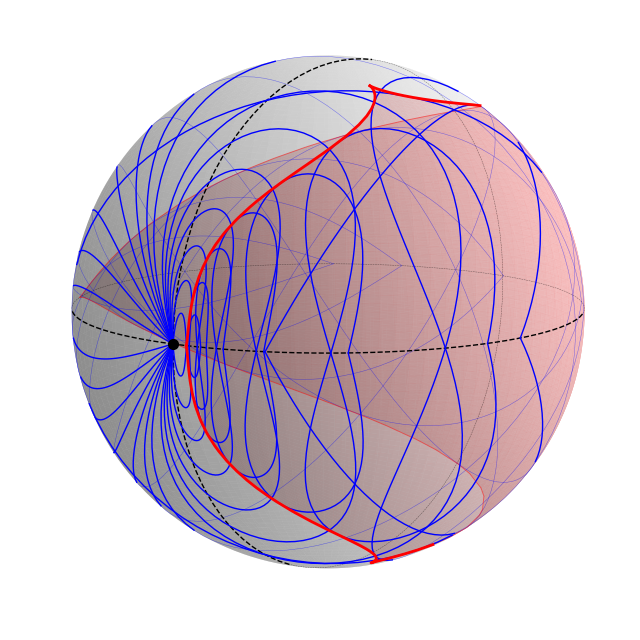

<Figure size 640x480 with 0 Axes>

In [6]:
prob.plot(geodesics=N, conjugate=True)

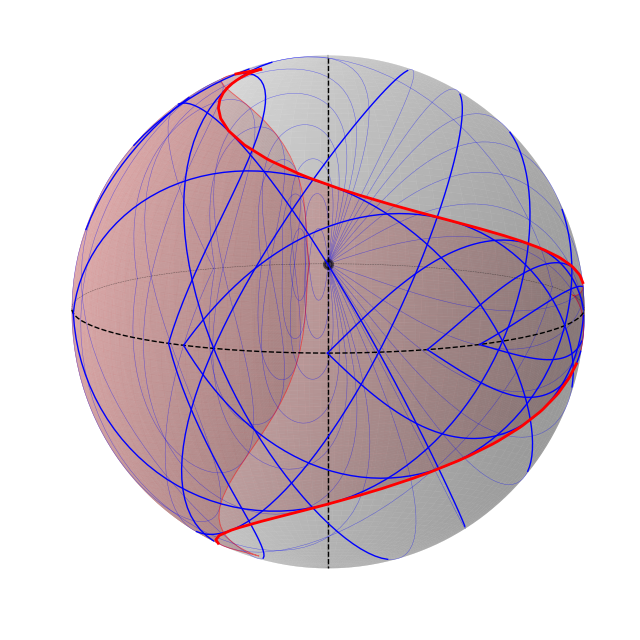

<Figure size 640x480 with 0 Axes>

In [7]:
prob.plot(geodesics=N, conjugate=True, azimuth=0)

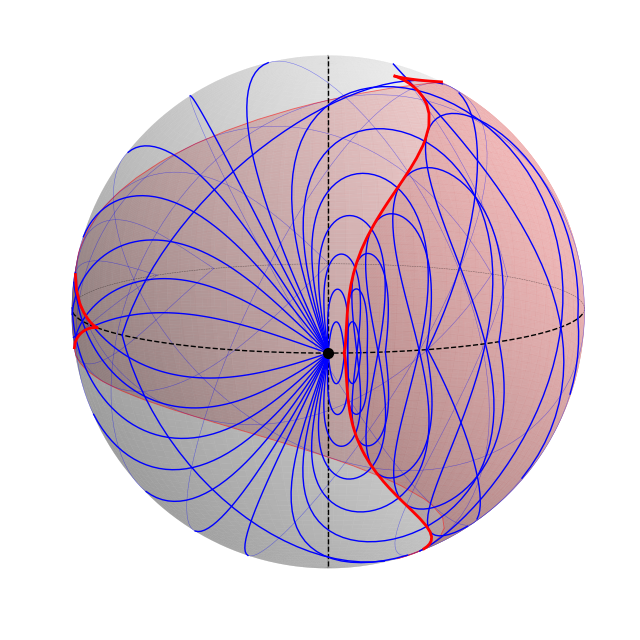

<Figure size 640x480 with 0 Axes>

In [8]:
prob.plot(geodesics=N, conjugate=True, azimuth=180)

### Wavefront

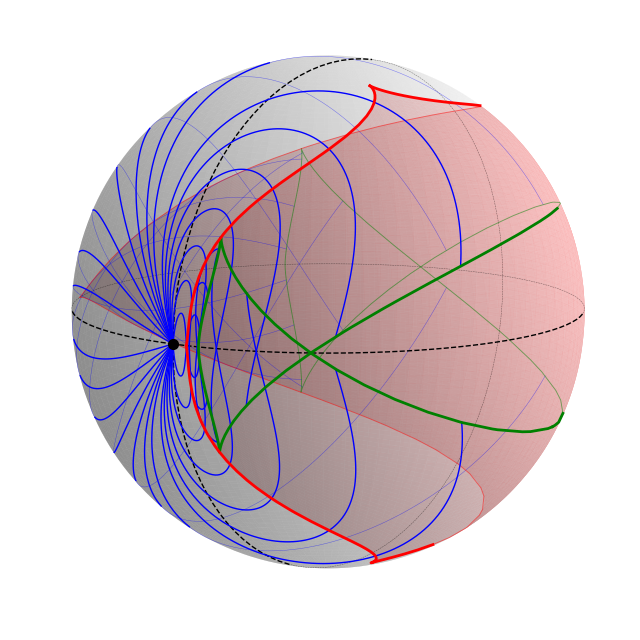

<Figure size 640x480 with 0 Axes>

In [9]:
prob.plot(geodesics=N, conjugate=True, wavefronts=True, tf=2.7)

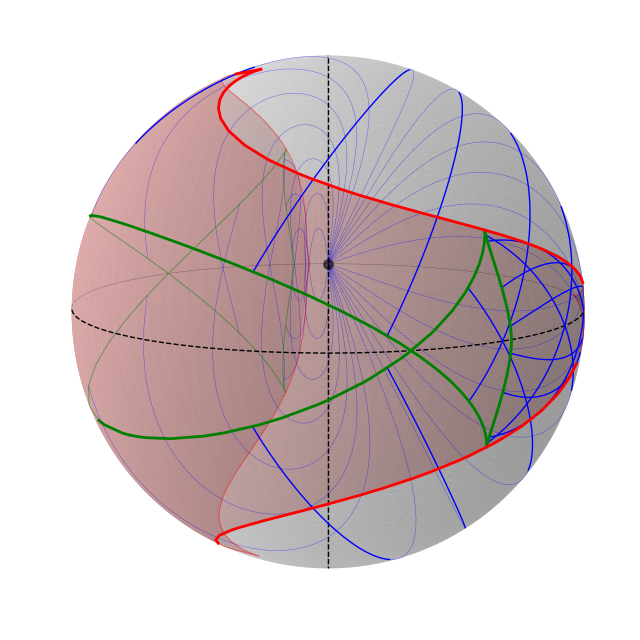

<Figure size 640x480 with 0 Axes>

In [10]:
prob.plot(geodesics=N, conjugate=True, wavefronts=True, tf=2.7, azimuth=0)

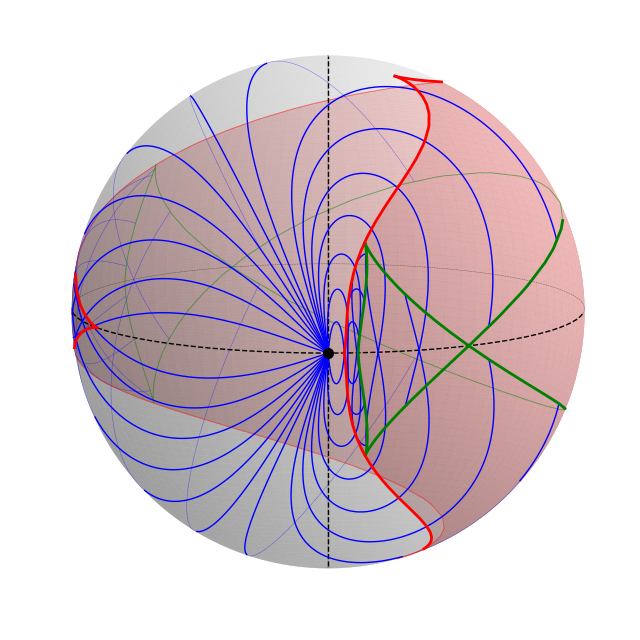

<Figure size 640x480 with 0 Axes>

In [11]:
prob.plot(geodesics=N, conjugate=True, wavefronts=True, tf=2.7, azimuth=180)

### Cut locus

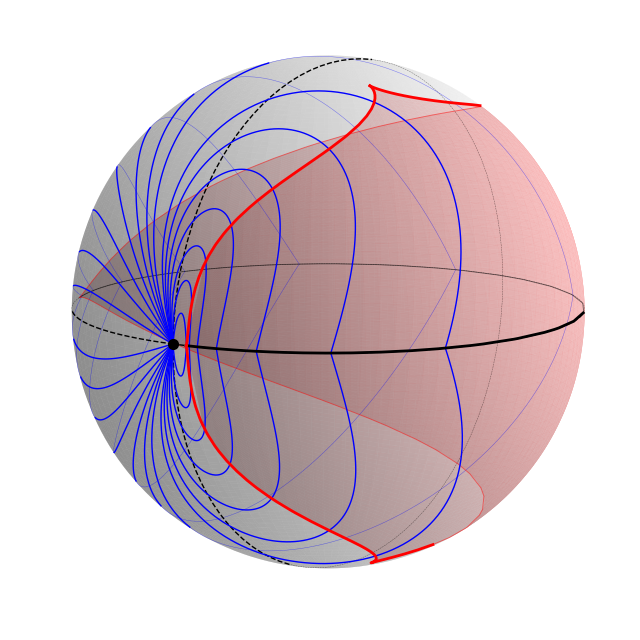

<Figure size 640x480 with 0 Axes>

In [12]:
prob.plot(geodesics=N, conjugate=True, cut=True)

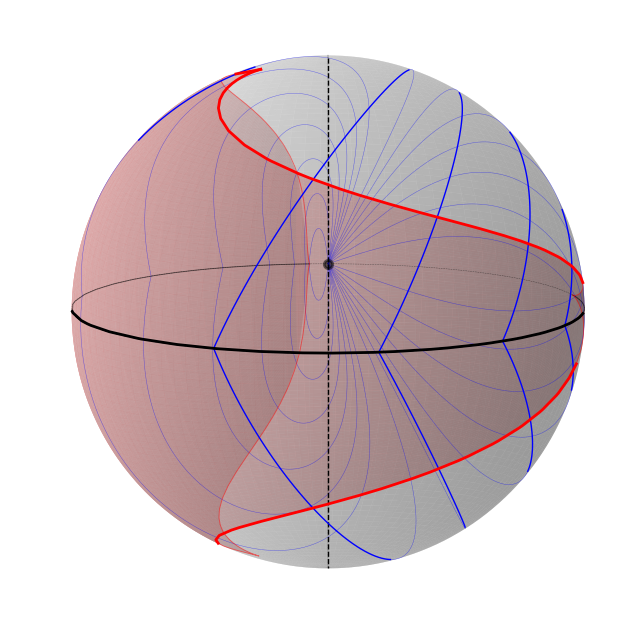

<Figure size 640x480 with 0 Axes>

In [13]:
prob.plot(geodesics=N, conjugate=True, cut=True, azimuth=0)

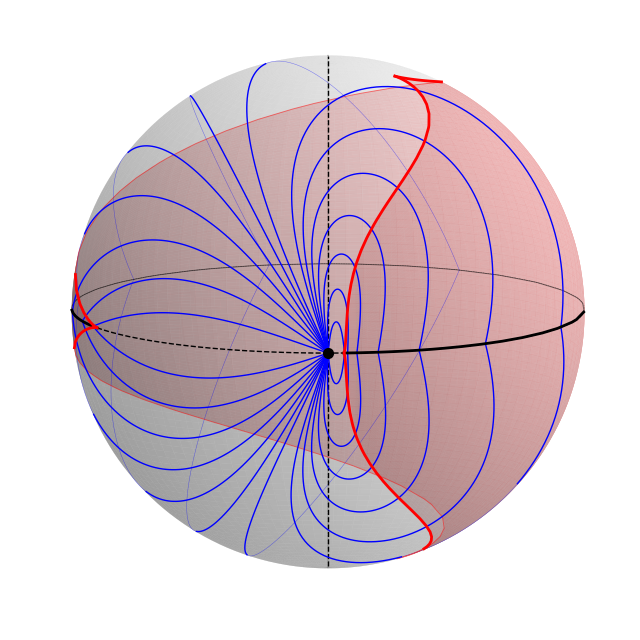

<Figure size 640x480 with 0 Axes>

In [14]:
prob.plot(geodesics=N, conjugate=True, cut=True, azimuth=180)